### Group Members:

- Omkar Ingale, 24-716-466
- Arjun Roy, 22-742-423
- Name, matriculation number

# Assignment 1: Universal Function Approximator


The goal of this exercise is to compare three different neural network architectures and analyze their capacity for function approximation:

1. $N_1$: One-layer network (linear transformation only)
2. $N_2$: One-layer network with non-linear activation function
3. $N_3$: Two-layer network (hidden layer with non-linear activation function)

They will be trained via gradient descent (with weight decay). To show the flexibility of the approach, three different functions will be approximated:
1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

In the theoretical section, the networks will be designed, and the necessary derivatives will be computed by hand.

In the coding section, we will: 

- implement the networks and their gradients,
- generate target data for three different functions, 
- apply the training procedure to the data, and 
- plot the resulting approximated function together with the data samples.

## Section 1: Theoretical Questions

### Network Design

#### Task 1.1: Network Structure

Given input $\vec x = (1, x)^T$, define three neural networks ($N_1$, $N_2$, $N_3$) mathematically, to reach output $y$. Use $g()$ to represent the activation function.

Explain how their structures differ and analyze their function approximation capabilities.

--- 
Note:

For one-layer networks, define parameter $\Theta=\vec w \in\mathbb R^{D+1}$

For two-layer network, define parameters $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ that are split into $\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}}$ for the first layer and $\vec w^{(2)}\in\mathbb R^{K+1}$ for the second layer

$N_1$: ...

$N_2$: ...

$N_3$: ...

#### Task 1.2: Network Comparison

Can the one-layer network approximate all three functions well? Why or why not?

What advantages does the two-layer network have compared to a one-layer network?

How can we determine the appropriate number of hidden neurons?
When looking at the example plots in the OLAT, how many hidden neurons do we need in order to approximate the functions? Is there any difference between the three target functions?



...

#### Task 1.3: Network Performance

If the network struggles to approximate a function well, what are some possible reasons?

How can we improve the network's performance?


##### Reasons
...

##### Solutions
...

### Derivatives

#### Task 1.4: Activation Function

Given the hyperbolic tangent ($\tanh$) activation function as:

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

Prove:

$$\frac{\partial}{\partial x} \tanh(x) = 1 - \tanh^2(x)$$

Hint: Apply the derivative rules as defined in the Lecture:
* Quotient rule
* Sum rule
* Exponential rule

Also, avoid factoring out parentheses.

$\frac{\partial}{\partial x} \tanh(x) =...$

#### Task 1.5: Weight Decay

Consider a loss function with L2 regularization (weight decay):
$$
L'(\theta) = L(\theta) + \frac{\lambda}{2} \|\theta\|^2
$$

Compute its derivative with respect to $\theta$: $$\frac{\partial}{\partial \theta} L'(\theta)$$


$\frac{\partial}{\partial \theta} L'(\theta) = ...$

#### Task 1.6

How large should an appropriate weight decay parameter $\lambda$ as shown in Task 1.5 be? What would happen if $\lambda$ is set too high or too low?

...

## Section 2: Coding

**<font color='red' size='5'>This section has to be submitted by 11:59 p.m. on Wednesday, March 12th, to be graded.</font>**



### Network Implementation
#### Task 2.1

Recall that for one-layer networks, we define parameter $\Theta=\vec w \in\mathbb R^{D+1}$, and for a two-layer network, we define parameters $\Theta=(\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}},\vec w^{(2)}\in\mathbb R^{K+1})$.

- D: The dimension of the input. In this assignment, $D = 1$ since there is only one input.
- K: The number of hidden neurons in the first layer of the two-layer network ($N_3$)

Implement a function that returns the network output for a given input $\vec x$, parameter(s) $\Theta$, and model_type ($N_1$, $N_2$, or $N_3$). Remember that the input of the function $\vec x = (1, x)^T$.

---
Note:

1. Use the `numpy` to implement the $\tanh$ function.
2. Use `numpy.concatenate` or `numpy.insert` to prepend $h_0$.
3. Make use of `numpy.dot` to compute matrix-vector and vector-vector products.

In [1]:
import numpy

def network(x, Theta, model_type):
    """
    Compute the output of a neural network model.

    Args:
        x: Input vector (1, x) including bias.
        Theta: Tuple of network parameters (W1, w2).
        model_type: Type of model (1, 2, or 3).

    Returns:
        y: Network output.
        h: Hidden layer output, or None.
    """

    W1, w2 = Theta # w2 is None if model_type is 1 or 2

    if model_type == 1:
        # One-layer network (Linear Model)
        y = numpy.dot(W1, x)
        return y, None # To make this consistent when model_type is 3

    elif model_type == 2:
        # One-layer network with tanh activation
        y = numpy.tanh(numpy.dot(W1, x))
        return y, None # To make this consistent when model_type is 3

    elif model_type == 3:
        # Two-layer network with tanh activation
        a_ = numpy.dot(W1, x)
        h_ = numpy.tanh(a_)
        h = numpy.insert(h_, 0, 1) # Add bias
        y = numpy.dot(w2, h)
        return y, h


#### Test 1: Sanity Check

We select a specific number of hidden neurons and create the weights accordingly, using all zeros in the first layer and all ones in the second. The test case below ensures that the function from Task 1 actually returns $11$ for those weights.

In [2]:
# Define test parameters
K = 20
D = 1
Theta_one_layer = [numpy.ones(D+1),None]
Theta_two_layer = [numpy.zeros((K, D+1)), numpy.ones(K+1)]
x = numpy.random.rand(D+1)

# Sanity check for N1
y1, _ = network(x, Theta_one_layer, 1)
assert abs(numpy.sum(x) - y1) < 1e-6
print("N1 test passed.")

# Sanity check for N2
y2, _ = network(x, Theta_one_layer, 2)
assert abs(numpy.tanh(numpy.sum(x)) - y2) < 1e-6
print("N2 test passed.")

# Sanity check for N3
y3, _ = network(x, Theta_two_layer, 3)
assert abs(1.0 - y3) < 1e-6
print("N3 test passed.")

N1 test passed.
N2 test passed.
N3 test passed.


### Gradient Implementation
#### Task 2.2: Gradient Computation


Implementation of a function that returns the gradient as defined for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, given weight(s) $\Theta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay.

---
Note:

We should make sure that both parts of the gradient are computed for $N_3$ (since $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ here).

This is a very slow implementation. We will see how to speed this up in the next lecture.

In [3]:
def compute_gradient(X, Theta, model_type, lambda_=1.):
    """
    Compute the gradient of the loss function with respect to the weights for each model type.

    Args:
        X: Dataset containing input-target pairs (x, t).
        Theta: Network parameters (W1, w2).
        model_type: Type of model (1, 2, or 3).
        lambda_: Weight decay parameter. Default is 1.0.

    Returns:
        Gradients with respect to W1 and w2. For model_type 1 and 2, w2 is None.
    """

    # split parameters for easier handling
    W1, w2 = Theta # w2 is None if model_type is 1 or 2

    # define gradient with respect to both parameters
    dW1 = numpy.zeros_like(W1, dtype=float)
    dw2 = numpy.zeros_like(w2, dtype=float) if w2 is not None else None # dw2 is None if model_type is 1 or 2

    # iterate over dataset
    for x, t in X:
        # compute the gradient
        y, h = network(x, Theta, model_type)

        if model_type == 1:
            # One-layer network (Linear Model)
            dW1 += (y - t) * x[1]
        elif model_type == 2:
            # One-layer network with tanh activation
            dW1 += (y - t) * (1 - numpy.tanh(numpy.dot(W1, x))**2) * x
        else:
            # Two-layer network with tanh activation
            # dW1 += (y - t) * w2[1:] * (1 - h[1:]**2) * x[1]
            dW1 += (y - t) * numpy.outer(w2[1:] * (1 - h[1:]**2), x)
            dw2 += (y - t) * h
        

    # Add penalty term/weight decay
    dW1 += lambda_ * W1
    if w2 is not None:
        dw2 += lambda_ * w2

    # anything else?
    dW1 /= len(X)
    if dw2 is not None:
        dw2 /= len(X)

    return dW1, dw2


#### Task 2.3: Gradient Descent

The procedure of gradient descent is the repeated application of two steps.

1. The gradient of loss $\nabla_{\Theta}\mathcal J^{L_2}$ is computed based on the current value of the parameters $\Theta$.
2. The weights are updated by moving a small step in the direction of the negative gradient:

$$
\begin{align}
    \Theta = \Theta - \eta \nabla_{\Theta}\mathcal J
\end{align}
$$

As a stopping criterion, we select the number of training epochs to be 10000.

Implementation of a function that performs gradient descent for a given dataset $X$, given initial parameters $\Theta$, a given learning rate $\eta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay, and returns the optimized parameters $\Theta^*$.

In [4]:
def gradient_descent(X, Theta, eta, model_type, lambda_=1.):
    epochs = 10000

    # perform iterative gradient descent
    for _ in range(epochs):
        # compute the gradient
        dW1, dw2 = compute_gradient(X, Theta, model_type, lambda_=lambda_)
        dW1 = -eta * dW1
        if dw2 is not None:
            dw2 = -eta * dw2

        # update the parameters
        Theta[0] += dW1
        if dw2 is not None:
            Theta[1] += dw2

    # return optimized parameters
    return Theta

### Datasets

#### Task 2.4: Data Samples

In total, we will test our gradient descent function with three different datasets. Particularly, we approximate

1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

Generate dataset $X_1$,  for $N=60$ samples randomly drawn from range $x\in[-2,2]$. Generate data $X_2$ for $N=50$ samples randomly drawn from range $x\in[-1,1]$. Generate dataset $X_3$ for $N=200$ samples randomly drawn from range $x\in[-4,2.5]$. Implement all three datasets as lists of tuples: $\{(\vec x^{[n]}, t^{[n]})\mid 1\leq n\leq N\}$

In [5]:
X1 = [(numpy.array([1, num], dtype=float), numpy.cos(3 * num)) for num in numpy.random.uniform(-2, 2, 60)]
X2 = [(numpy.array([1, num], dtype=float), numpy.exp(-1 * num**2)) for num in numpy.random.uniform(-1, 1, 50)]
X3 = [(numpy.array([1, num], dtype=float), num**5 + 3 * num**4 - 6 * num**3 - 12 * num**2 + 5 * num + 129) for num in numpy.random.uniform(-4, 2.5, 200)]

#### Test 2: Sanity Check

The test case below ensures that the elements of each generated dataset are tuples with two dimensions.

In [6]:
assert all(
    isinstance(x, (tuple,list)) and
    len(x) == 2 and
    isinstance(x[0], (tuple,list,numpy.ndarray)) and
    len(x[0] == 2) and
    isinstance(x[1], float)
    for X in (X1, X2, X3)
    for x in X
)

print('Test passed!')

Test passed!


### Function Approximation
Finally, we want to make use of our gradient descent implementation to approximate our functions. In order to see our success, we want to plot the functions together with the data.

#### Task 2.5: Define hidden Neurons
How many hidden neurons will we need for $N_3$? Use the answers from Task 1.2.

In [7]:
# Define the number of neurons for each target function based on your discussion
K1 = 10
K2 = 2
K3 = 80

#### Task 2.6: Random Parameters

For each of the networks, randomly initialize the parameters $\Theta_1,\Theta_2,\Theta_3\in[-1,1]$ for each of the datasets.

For $N_3$, use the number of hidden neurons estimated in Task 1.2 and implemented in Task 2.5.

---
Note:

  1. You can use `numpy.random.uniform` to initialize the weights.
  2. Make sure that the weight matrices are instantiated in the correct dimensions.
  3. Theta should always have two elements. The second element can be `None` for one-layer networks.


In [8]:
Theta_N1 = {
    "X1": [numpy.random.uniform(-1, 1, 2), None],
    "X2": [numpy.random.uniform(-1, 1, 2), None],
    "X3": [numpy.random.uniform(-1, 1, 2), None]
}

Theta_N2 = {
    "X1": [numpy.random.uniform(-1, 1, 2), None],
    "X2": [numpy.random.uniform(-1, 1, 2), None],
    "X3": [numpy.random.uniform(-1, 1, 2), None]
}

Theta_N3 = {
    "X1": [numpy.random.uniform(-1, 1, (K1, 2)), numpy.random.uniform(-1, 1, K1 + 1)],
    "X2": [numpy.random.uniform(-1, 1, (K2, 2)), numpy.random.uniform(-1, 1, K2 + 1)],
    "X3": [numpy.random.uniform(-1, 1, (K3, 2)), numpy.random.uniform(-1, 1, K3 + 1)]
}

#### Task 2.7: Run Gradient Descent

For each network, call gradient descent function from Task 2.3 using the datasets $X_1, X_2, X_3$, the according created parameters $\Theta_1,\Theta_2,\Theta_3$. Store the resulting optimized weights $\Theta_1^*, \Theta_2^*, \Theta_3^*$.

Based on your chosen learning rates $\eta$ and weight decay parameter $\lambda$, you may need to optimize them for these functions. Do you see any differences? What are the best learning rates that you can find?

---
<span style="color:red">WARNING: Depending on the implementation, this might run for several minutes!</span>

---
Note:

1. Start with $\eta=0.1$ and play around with the learning rate improve adaptation.
2. $\eta=0.1$ is too large for $X_3$.

In [9]:
# N1
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function

# used different eta like 0.1, 0.05, 0.01 and lambda_ like 0.1, 0.05, 0.01
n1_x1_opt = gradient_descent(X1, Theta_N1["X1"], eta = 0.01, model_type = 1, lambda_ = 0.05)
n1_x2_opt = gradient_descent(X2, Theta_N1["X2"], eta = 0.01, model_type = 1, lambda_ = 0.05)
n1_x3_opt = gradient_descent(X3, Theta_N1["X3"], eta = 0.01, model_type = 1, lambda_ = 0.05)

In [10]:
# N2
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function

# used different eta like 0.1, 0.05, 0.01 and lambda_ like 0.1, 0.05, 0.01
n2_x1_opt = gradient_descent(X1, Theta_N2["X1"], eta = 0.05, model_type = 2, lambda_ = 0.1)
n2_x2_opt = gradient_descent(X2, Theta_N2["X2"], eta = 0.05, model_type = 2, lambda_ = 0.1)
n2_x3_opt = gradient_descent(X3, Theta_N2["X3"], eta = 0.05, model_type = 2, lambda_ = 0.1)

In [11]:
# N3
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function

# used different eta like 0.1, 0.05, 0.01 and lambda_ like 0.1, 0.05, 0.01
n3_x1_opt = gradient_descent(X1, Theta_N3["X1"], eta = 0.01, model_type = 3, lambda_ = 0.01)
n3_x2_opt = gradient_descent(X2, Theta_N3["X2"], eta = 0.01, model_type = 3, lambda_ = 0.01)
n3_x3_opt = gradient_descent(X3, Theta_N3["X3"], eta = 0.01, model_type = 3, lambda_ = 0.001)

### Data and Function Plotting

### Task 2.8: Plotting Function

Implement a plotting function that takes a given dataset $X$, given parameters $\Theta$, model_type, and a defined range $R=[\min,\max]$. Each data sample $(x^{[n]},t^{[n]})$ of the dataset is plotted as an $''x''$. In order to plot the function that is approximated by the network, generate sufficient equally-spaced input values $x\in R$, compute the network output $y$ for these inputs, and plot them with a line.

---
Note:

  1. The dataset $X$ is defined as above, a list of tuples $(\vec x, t)$.
  2. Each input in the dataset is defined as $\vec x = (1,x)^T$.
  3. Equidistant points can be obtained via `numpy.arange`.


In [12]:
from matplotlib import pyplot
def plot(X, Theta, model_type, R):
  # first, plot data samples
  x_data = [x[1] for x, t in X]  # Extract input values
  t_data = [t for x, t in X]     # Extract target values
  pyplot.plot(x_data, t_data, "rx", label="Data")

  # define equidistant points from min (R[0]) to max (R[1]) to evaluate the network
  x = numpy.linspace(R[0], R[1], 100)
  y = []
  for x_val in x:
    x_input = numpy.array([1, x_val])
    output, _ = network(x_input, Theta, model_type)
    y.append(output)
  # plot network approximation
  pyplot.plot(x,y,"k-", label="network")
  pyplot.legend()

#### Task 2.9: Plot Three Functions

For each of the datasets and their optimized parameters, call the plotting function from Task 2.8. Use range $R=[-3,3]$ for dataset $X_1$, range $R=[-2,2]$ for $X_2$, and range $R=[-5,4]$ for dataset $X_3$.

Note that the first element of range $R$ should be the lowest $x$-location, and the second element of $R$ is the highest value for $x$.

Repeat for three networks.

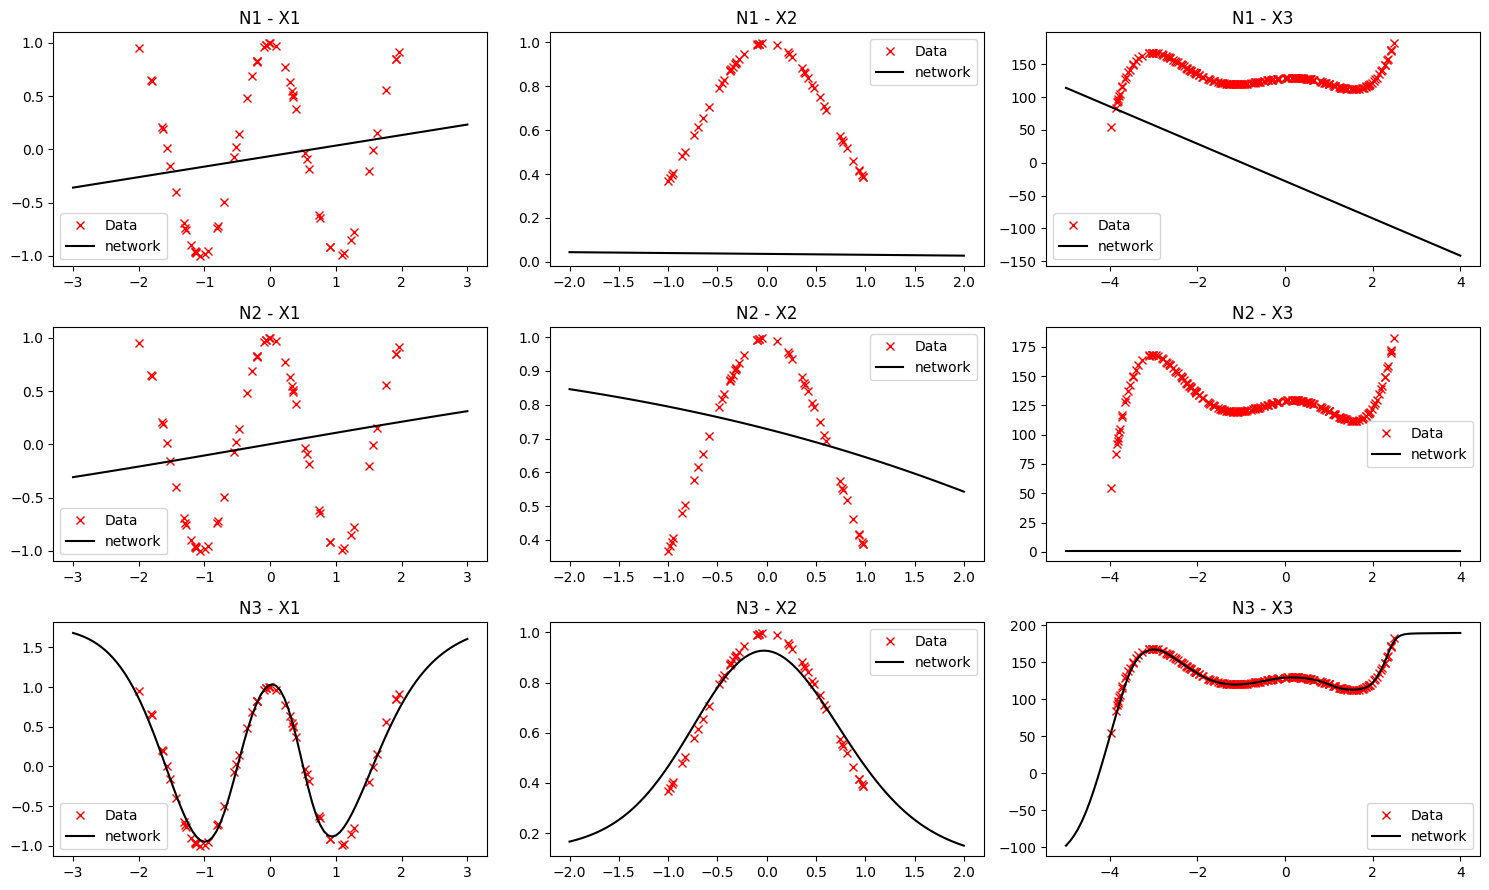

In [13]:
## USED A DIFFERENT APPROACH TO PLOT THE GRAPHS, BUT WE DID CALL THE PLOT FUNCTION. HOPE THIS IS OKAY :)

# Create a figure with 3 rows, 3 columns
figure = pyplot.figure(figsize=(15, 9))

# First row - model 1
pyplot.subplot(331)
pyplot.title("N1 - X1")
plot(X1, n1_x1_opt, 1, [-3, 3])

pyplot.subplot(332)
pyplot.title("N1 - X2")
plot(X2, n1_x2_opt, 1, [-2, 2])

pyplot.subplot(333)
pyplot.title("N1 - X3")
plot(X3, n1_x3_opt, 1, [-5, 4])

# Second row - model 2
pyplot.subplot(334)
pyplot.title("N2 - X1")
plot(X1, n2_x1_opt, 2, [-3, 3])

pyplot.subplot(335)
pyplot.title("N2 - X2")
plot(X2, n2_x2_opt, 2, [-2, 2])

pyplot.subplot(336)
pyplot.title("N2 - X3")
plot(X3, n2_x3_opt, 2, [-5, 4])

# Third row - model 3
pyplot.subplot(337)
pyplot.title("N3 - X1")
plot(X1, n3_x1_opt, 3, [-3, 3])

pyplot.subplot(338)
pyplot.title("N3 - X2")
plot(X2, n3_x2_opt, 3, [-2, 2])

pyplot.subplot(339)
pyplot.title("N3 - X3")
plot(X3, n3_x3_opt, 3, [-5, 4])

pyplot.tight_layout()
pyplot.show()